In [5]:
import pandas as pd


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [7]:
data=pd.read_csv("Spam.csv" , encoding="latin-1")

In [8]:
data.sample(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4235,spam,U can WIN å£100 of Music Gift Vouchers every w...,NaN,NaN,NaN
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# Data Cleaning

In [11]:
data.drop(columns=["Unnamed: 2","Unnamed: 3" , "Unnamed: 4"] , inplace=True)

In [12]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


note* : ham ===> not spam 

In [13]:
data.rename(columns={"v1": "category" , "v2":"Sms"},inplace=True)
data

,category,Sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_en = LabelEncoder()
data["category"]=label_en.fit_transform(data["category"])

In [16]:
data.head(5)

,category,Sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


    -1 for `spam` 
    -0  for `not spam /ham`

checking duplicated values

In [17]:
data.duplicated().sum()

403

In [18]:
data=data.drop_duplicates()

In [19]:
data.shape

(5169, 2)

duplicated values have been deleted.

<Axes: xlabel='category', ylabel='count'>

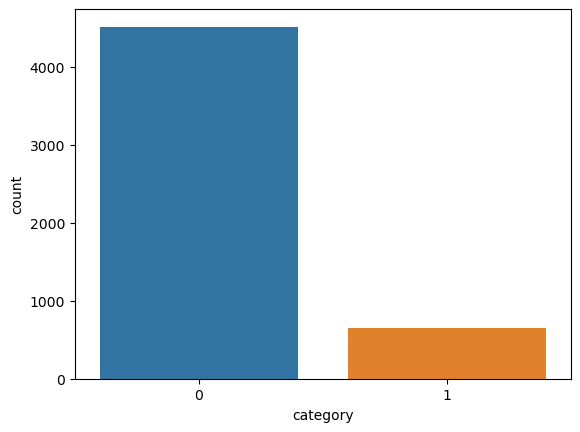

In [20]:
import seaborn as sns

sns.countplot(data=data  , x = "category")

In [21]:
values=data["category"].value_counts()

In [22]:
values

0    4516
1     653
Name: category, dtype: int64

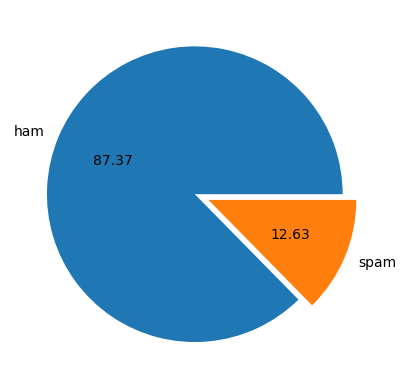

In [23]:
plt.pie(values , labels=["ham" , "spam"] , autopct="%0.2f" ,explode=(0,0.1) )
plt.show()

In [24]:
# imbalance data

In [25]:
# !pip install nltk

In [23]:
# !pip install tensorflow

In [26]:
import nltk
# nltk.download()


In [27]:
# nltk.download("punkt")

In [28]:
# nltk.word_tokenize(data["Sms"])

In [29]:
data.head(2)

,category,Sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [30]:
data["total_char"] = data["Sms"].apply(len)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\2039162487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["total_char"] = data["Sms"].apply(len)


In [31]:
data.sample(2)

,category,Sms,total_char
1433,0,You intrepid duo you! Have a great time and se...,63
2597,0,"Got fujitsu, ibm, hp, toshiba... Got a lot of ...",65


We have a DataFrame named "data," which contains a column labeled "Sms." The objective is to tokenize the text in the "Sms" column, i.e., to break down each SMS message into individual words or tokens.

In [32]:
data["total_words"]=data["Sms"].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\1953348723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["total_words"]=data["Sms"].apply(lambda x: len(nltk.word_tokenize(x)))


The lambda function takes an input x, which represents each SMS message in the "Sms" column. The function inside the lambda, nltk.word_tokenize(x), performs the tokenization of the SMS message x.

nltk.word_tokenize(x): The nltk.word_tokenize function is part of the Natural Language Toolkit (NLTK) library. It is used to break down a text (string) into individual words or tokens. NLTK is a popular Python library for working with human language data and provides various tools for natural language processing tasks.

In [33]:
data.sample(2)

,category,Sms,total_char,total_words
1028,0,"Lol you forgot it eh ? Yes, I'll bring it in babe",49,14
5024,0,I was gonna ask you lol but i think its at 7,44,13


In [34]:
data["Sms"].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Sms, Length: 5169, dtype: object

In [35]:
data["total_sentence"] = data["Sms"].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\4214892977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["total_sentence"] = data["Sms"].apply(lambda x: len(nltk.sent_tokenize(x)))


In [36]:
data.sample(2)

,category,Sms,total_char,total_words,total_sentence
3919,1,FREE>Ringtone! Reply REAL or POLY eg REAL1 1. ...,158,36,7
3308,0,Okie Ì_ wan meet at bishan? Cos me at bishan n...,72,19,3


In [37]:
 data.describe()

,category,total_char,total_words,total_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [38]:
#ham messages
ham_message = data[data["category"]==0][["Sms","total_char","total_words","total_sentence"]]

In [39]:
#spam messages
spam_message = data[data["category"]!=0][["Sms" , "total_char","total_words","total_sentence"]]

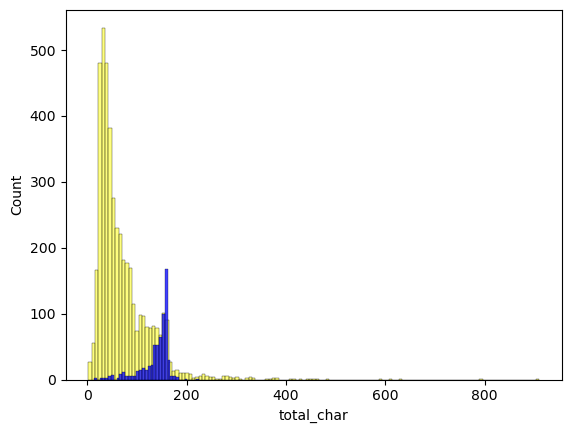

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ham_message["total_char"] , color = "yellow"  , alpha= 0.5)
sns.histplot(spam_message["total_char"] , color = "blue") 
plt.show()


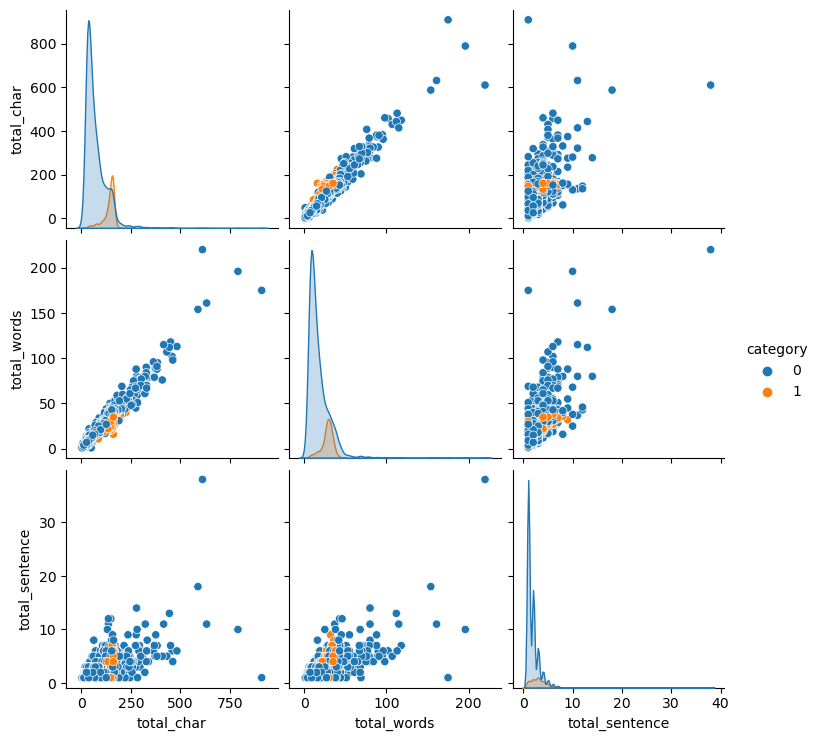

In [41]:
sns.pairplot(data , hue = "category")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\4030678945.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr() , annot = True)


<Axes: >

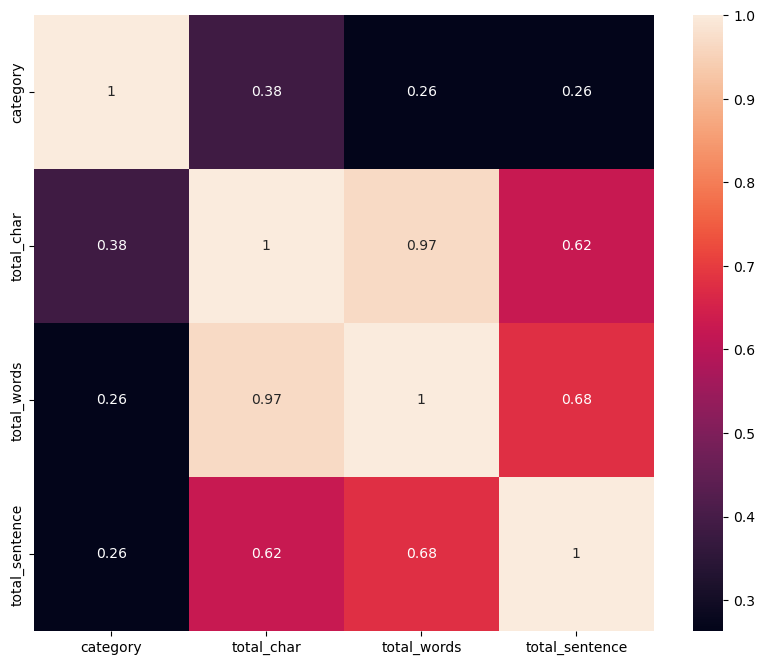

In [42]:
fig,(ax1) = plt.subplots(1,1, figsize=(10, 8))
sns.heatmap(data.corr() , annot = True)

# Data (Text) Preprocessing

    -lower case
    -Tokenisation
    -removing Special charecter
    -removing stop word and pantuation
    -Stemming(removing similar words)

In [47]:
# checking stopwords

from nltk.corpus import stopwords 
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print(ps.stem("helloing")) # print only root word
print(ps.stem("dance"))

hello
danc


In [50]:
def transform_sms (Sms):
    Sms = Sms.lower() 
    words = nltk.word_tokenize(Sms) # tokenizing , making a list of every words in a sentence
    word_list1=[]
    word_list2=[]
    word_list3=[]
    
    for word in words:
        if word.isalnum():  # removing special chaercters
            word_list1.append(word)
            
    for word in word_list1:
        if word not in stopwords.words("english"): # removing stopwords 
            word_list2.append(word)
            
    for word  in word_list2:
        word_list3.append(ps.stem(word)) # stemming out the words
                
                
                 
            
    
    return " ".join(word_list3) # will join all the words and make a sentence

In [51]:
transform_sms("HIII EveryoNe , My nAMe is are so because on the sawan _ rawat and i earn in $ dollar , do you missing me??") 

'hiii everyon name sawan rawat earn dollar miss'

In [52]:
data["Sms"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [53]:
transform_sms(data["Sms"][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

### adding our tranfirmed_sms to out dataframe

In [54]:
data["transform_sms"]=data["Sms"].apply(transform_sms)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\3877215696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["transform_sms"]=data["Sms"].apply(transform_sms)


In [56]:
data.sample(2)

,category,Sms,total_char,total_words,total_sentence,transform_sms
504,1,+123 Congratulations - in this week's competit...,170,32,3,congratul week competit draw u prize claim cal...
1998,0,"Well, I have to leave for my class babe ... Yo...",117,31,1,well leav class babe never came back hope nice...


# Word Cloud

In [57]:
# !pip install wordcloud


In [58]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height=500 , min_font_size=10 , background_color="black")
spam_wc=wc.generate(data[data["category"]==1]["transform_sms"].str.cat(sep=" "))

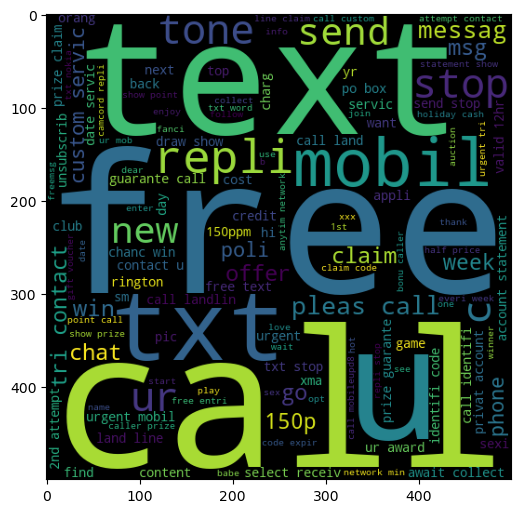

In [59]:
plt.figure(figsize=(6 ,10))
plt.imshow(spam_wc)

In [60]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height=500 , min_font_size=10 , background_color="black")
ham_wc=wc.generate(data[data["category"]==0]["transform_sms"].str.cat(sep=" "))

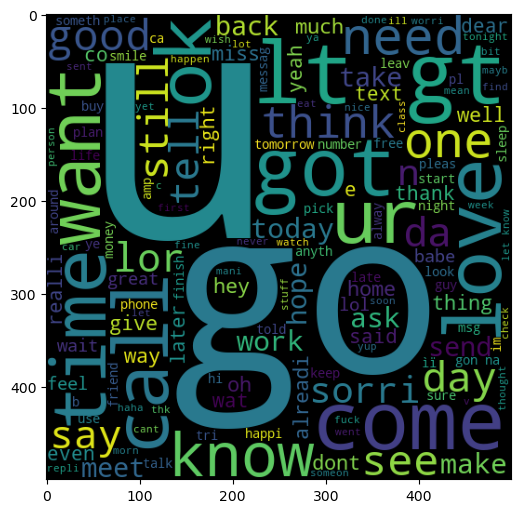

In [61]:
plt.figure(figsize=(6 ,10))
plt.imshow(ham_wc)

In [62]:
#extracting every word from the spam transform msg
spam_corpus=[]
for sms in data[data["category"]==1]["transform_sms"].tolist():
     for word in sms.split():
            spam_corpus.append(word)

In [63]:
len(spam_corpus)

9939

In [64]:
from collections import Counter
Counter(spam_corpus) # return a dictionary of words and their count

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [65]:
Counter(spam_corpus).most_common(25)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51)]

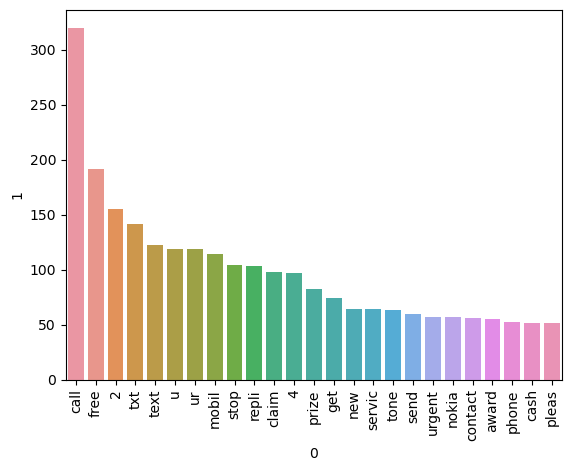

In [66]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(25))[0] ,y=pd.DataFrame(Counter(spam_corpus).most_common(25))[1])
plt.xticks(rotation = "vertical")
plt.show()

In [67]:
ham_corpus = []
for sms in data[data["category"]==0]["transform_sms"].tolist():
    for word in sms.split():
        ham_corpus.append(word)

In [68]:
len(ham_corpus)

35404

In [69]:
from collections import Counter
Counter(ham_corpus) # return a dictionary of words and their count

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [70]:
Counter(ham_corpus).most_common(25)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147)]

In [71]:
pd.DataFrame(Counter(ham_corpus).most_common(25))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


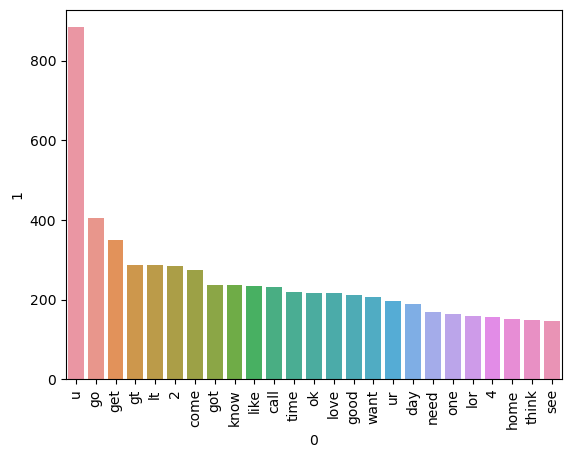

In [72]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(25))[0] , y=pd.DataFrame(Counter(ham_corpus).most_common(25))[1])
plt.xticks(rotation="vertical")
plt.show()

# model 

### converting text into number (vectors)== vectorization

### A. using CountVectorizer

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
cv= CountVectorizer()

In [75]:
X = cv.fit_transform(data["transform_sms"]) # it produces sparse matrix

In [76]:
X

<5169x6708 sparse matrix of type '<class 'numpy.int64'>'
	with 40628 stored elements in Compressed Sparse Row format>

In [77]:
X = X.toarray() # converting sparse matrix into array

In [78]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
y = data["category"]

In [80]:
y.sample(2)

373    0
788    1
Name: category, dtype: int32

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train , x_test , y_train , y_test = train_test_split(X ,y, random_state =42 , test_size = 0.2)

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4135, 6708)
(1034, 6708)
(4135,)
(1034,)


In [84]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB


In [85]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [86]:
gnb.fit(x_train,y_train)
gnb_pred = gnb.predict(x_test)


mnb.fit(x_train,y_train)
mnb_pred = mnb.predict(x_test)


bnb.fit(x_train,y_train)
bnb_pred = bnb.predict(x_test)



In [87]:
from sklearn.metrics import confusion_matrix ,precision_score , recall_score ,f1_score

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
print(f"""cross_val_score of gnb {cross_val_score(gnb , x_train , y_train , cv=3).mean()}
cross_val_score of mnb {cross_val_score(mnb , x_train , y_train , cv=3).mean()}
cross_val_score of bnb {cross_val_score(bnb , x_train , y_train , cv=3).mean()}""")

cross_val_score of gnb 0.8824655056337845
cross_val_score of mnb 0.9726730664859197
cross_val_score of bnb 0.9571953762165428


as we can see above that cross_val_score is more for mnb and followed by bnb , also acuracy score is not the best way to measure , lets look for cinfusion matrix and precison and recall score

confusion matrics

In [90]:
print(f"""confusion_matrix of gnb
{confusion_matrix(y_test , gnb_pred)}
confusion_matrix of mnb 
{confusion_matrix(y_test , mnb_pred)}
confusion_matrix of bnb 
{confusion_matrix(y_test , bnb_pred)}""")

confusion_matrix of gnb
[[772 117]
 [ 19 126]]
confusion_matrix of mnb 
[[872  17]
 [ 10 135]]
confusion_matrix of bnb 
[[885   4]
 [ 31 114]]


In [91]:
print(f"""
precision_score of gnb {precision_score(y_test , gnb_pred)} ,recall_score of gnb {recall_score(y_test , gnb_pred)}
precision_score of mnb {precision_score(y_test , mnb_pred)},recall_score of mnb {recall_score(y_test , mnb_pred)}
precision_score of bnb {precision_score(y_test , bnb_pred)},recall_score of bnb {recall_score(y_test , bnb_pred)}


""")


precision_score of gnb 0.5185185185185185 ,recall_score of gnb 0.8689655172413793
precision_score of mnb 0.8881578947368421,recall_score of mnb 0.9310344827586207
precision_score of bnb 0.9661016949152542,recall_score of bnb 0.7862068965517242





lets combining scores of recall and precison

In [92]:
print(f"""f1_score of gnb {f1_score(y_test , gnb_pred)}
f1_score of mnb {f1_score(y_test , mnb_pred)}
f1_score of bnb {f1_score(y_test , bnb_pred)}""")

f1_score of gnb 0.6494845360824741
f1_score of mnb 0.9090909090909091
f1_score of bnb 0.8669201520912548


### B.  using tfidfvectorizer

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
tfidf=TfidfVectorizer()

In [120]:
X=tfidf.fit_transform(data["transform_sms"])
# y is already transformed

In [121]:
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
x_train , x_test , y_train , y_test = train_test_split(X ,y, random_state =42 , test_size = 0.2)

In [123]:
X.shape

(5169, 6708)

In [124]:
gnb.fit(x_train,y_train)
gnb_pred = gnb.predict(x_test)


mnb.fit(x_train,y_train)
mnb_pred = mnb.predict(x_test)


bnb.fit(x_train,y_train)
bnb_pred = bnb.predict(x_test)



cross_val_score

In [125]:
print(f"""cross_val_score of gnb {cross_val_score(gnb , x_train , y_train , cv=3).mean()}
cross_val_score of mnb {cross_val_score(mnb , x_train , y_train , cv=3).mean()}
cross_val_score of bnb {cross_val_score(bnb , x_train , y_train , cv=3).mean()}""")

cross_val_score of gnb 0.8798044690679495
cross_val_score of mnb 0.9402654300652578
cross_val_score of bnb 0.9571953762165428


confusion_matrix

In [126]:
print(f"""confusion_matrix of gnb
{confusion_matrix(y_test , gnb_pred)}
confusion_matrix of mnb 
{confusion_matrix(y_test , mnb_pred)}
confusion_matrix of bnb 
{confusion_matrix(y_test , bnb_pred)}""")

confusion_matrix of gnb
[[772 117]
 [ 24 121]]
confusion_matrix of mnb 
[[888   1]
 [ 39 106]]
confusion_matrix of bnb 
[[885   4]
 [ 31 114]]


precsion_recall_score

In [127]:
print(f"""
precision_score of gnb {precision_score(y_test , gnb_pred)} ,recall_score of gnb {recall_score(y_test , gnb_pred)}
precision_score of mnb {precision_score(y_test , mnb_pred)},recall_score of mnb {recall_score(y_test , mnb_pred)}
precision_score of bnb {precision_score(y_test , bnb_pred)},recall_score of bnb {recall_score(y_test , bnb_pred)}


""")


precision_score of gnb 0.5084033613445378 ,recall_score of gnb 0.8344827586206897
precision_score of mnb 0.9906542056074766,recall_score of mnb 0.7310344827586207
precision_score of bnb 0.9661016949152542,recall_score of bnb 0.7862068965517242





f1_score

In [128]:
print(f"""f1_score of gnb {f1_score(y_test , gnb_pred)}
f1_score of mnb {f1_score(y_test , mnb_pred)}
f1_score of bnb {f1_score(y_test , bnb_pred)}""")

f1_score of gnb 0.6318537859007832
f1_score of mnb 0.8412698412698413
f1_score of bnb 0.8669201520912548


### since our data is imbalanced , so accuracy (cross_val_score) is not that much important so we will go with precision score , also precision score of mnb using tfidf vectroization is most we will use that

    lets check on some more classification algorithm

In [129]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [130]:
svc_clf = SVC(gamma=1 )
mnb_clf = MultinomialNB()
lr_clf = LogisticRegression( C=0.5 , random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=6)
for_clf = RandomForestClassifier(n_estimators=60 , random_state=42)

In [131]:
classifier={
    "svc":svc_clf,
    "mnb":mnb_clf,
    "lr":lr_clf,
    "tree":tree_clf,
    "forest": for_clf
}

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming you have already defined x_train, x_test, y_train, y_test

def train_classifier(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    precision = precision_score(y_test, y_pred)
    cross_val_scoring = cross_val_score(clf, x_train, y_train, cv=3).mean()
    return precision, cross_val_scoring

precision_scores = []
cross_val_scores = []

for name, clf in classifier.items():
    current_precision, current_cross_val_score = train_classifier(clf, x_train, x_test, y_train, y_test)
    print("For", name)
    print("Precision Score:", current_precision)
    print("Cross-Val Score:", current_cross_val_score)
    
    precision_scores.append(current_precision)
    cross_val_scores.append(current_cross_val_score)


For svc
Precision Score: 0.9912280701754386
Cross-Val Score: 0.9620313760242887
For mnb
Precision Score: 0.9906542056074766
Cross-Val Score: 0.9402654300652578
For lr
Precision Score: 0.922077922077922
Cross-Val Score: 0.9088253795178419
For tree
Precision Score: 0.7867647058823529
Cross-Val Score: 0.9392980196064192
For forest
Precision Score: 0.9913793103448276
Cross-Val Score: 0.9627575916724466


In [133]:
performance_df = pd.DataFrame({'Algorithm':classifier.keys(),'cross_val_scores':cross_val_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,cross_val_scores,Precision
4,forest,0.962758,0.991379
0,svc,0.962031,0.991228
1,mnb,0.940265,0.990654
2,lr,0.908825,0.922078
3,tree,0.939298,0.786765


we can see that SVC and NB(mnb) performed the best , we can rely our model on one of the them ,

### before finalizing lets try VotingClassifier, which is combination of the top 3 classifiers above

In [134]:
from sklearn.ensemble import VotingClassifier

In [135]:
voting = VotingClassifier(estimators=[("SVM" ,svc_clf) , ("NB",mnb_clf) ,("RF",for_clf) ] ,voting="hard" )

In [136]:
voting.fit(x_train , y_train)

VotingClassifier(estimators=[('SVM', SVC(gamma=1)), ('NB', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=60,
                                                     random_state=42))])

In [137]:
voting_pred = voting.predict(x_test)
print(f"precision score: {precision_score(voting_pred, y_test)}")

precision score: 0.7793103448275862


our precision score is reduced hence VotingClassifier is not a good approch

## the best model i think is SVC , with whom iam going to proceed further 

CREATING PIPELINE

In [139]:
import pickle
pickle.dump(tfidf,open("vectorizers1.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))

In [142]:
data


,category,Sms,total_char,total_words,total_sentence,transform_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [150]:
data["Sms"][5567]


'This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'